<a href="https://colab.research.google.com/github/tiagocamillo/Lab-Desenv-BD-VI-IA/blob/main/kmeans_clustering%20-%20TIAGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - K-Means
> Neste exemplo vamos agrupar usuários com gostos similares para filmes

### Preprocess

In [ ]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

In [ ]:
# Lemos dados sobre estudantes
urlStudents = 'https://raw.githubusercontent.com/tiagocamillo/Lab-Desenv-BD-VI-IA/main/Dados/snsdata.csv'
df_students = pd.read_csv(urlStudents, sep = ',')
df_students.head(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
# Numero de Registros antes de tratamento
print("Numero de Registros antes de tratamento: " + str(df_students.shape[0]))

Numero de Registros antes de tratamento: 30000


In [ ]:
# Drop coluna de ano de graduação
df_students = df_students.drop(columns=['gradyear'])

# Troco os valores de Genero para número
df_students['gender'] = df_students['gender'].map({'M': 1, 'F': 2})

# Removo os registros que possui valores NaN
df_students = df_students.dropna()

df_students.head(5)

,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,1.0,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,18.801,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.0,18.930,72,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0


In [ ]:
# Numero de Registros depois de tratamento
print("Numero de Registros depois de tratamento: " + str(df_students.shape[0]))

Numero de Registros depois de tratamento: 24005


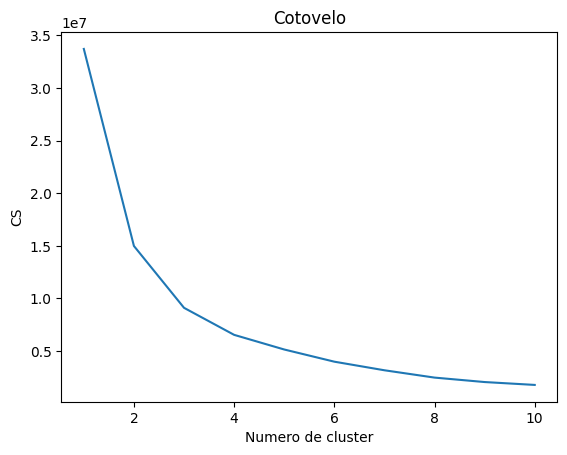

In [ ]:
# Método do Cotovelo para identificar número ideal de Clusters
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_students)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método do Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
# Agrupamos usando K-Means
from sklearn.cluster import KMeans
# Será gerado 3 grupos de acordo com o Cotovelo
model = KMeans(n_clusters= 3)
model.fit(df_students)
group = model.predict(df_students)
df_students.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,1.0,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,18.801,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.0,18.930,72,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,1.0,18.322,17,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2.0,19.055,52,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2.0,18.708,39,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,2.0,18.543,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2.0,19.463,21,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# PCA (Principal Component Analysis: https://builtin.com/data-science/step-step-explanation-principal-component-analysis) com 2 componentes
# O correto seria verificar a melhor quantidade de componentes (exemplo: https://www.kaggle.com/code/jeanc2020/pca-clustering-kmeans)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df_students)

# Converte em dataframe
df_pca = pd.DataFrame(data=pca_array, index=df_students.index.copy())
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['group'] = group

df_pca.head()

,PC1,PC2,group
0,-23.769515,0.950348,0
1,-30.754149,0.728371,0
2,38.232642,0.523569,1
3,-30.767771,0.818919,0
6,41.232844,1.124066,1


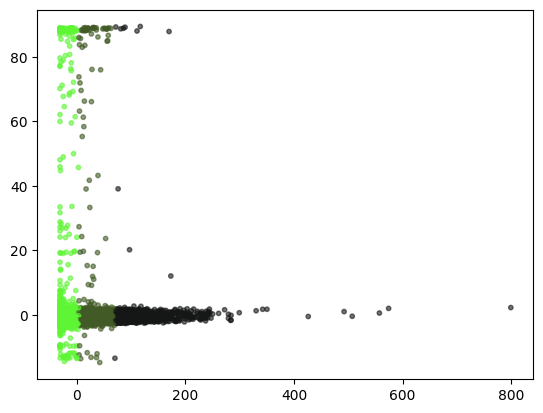

In [ ]:
# Geração do gráfico em 2 dimensões
colors = ['#5DF534', '#425B26', '#151716', '#876E03', '#E8CECF', '#023411', '#042E54', '#2572D3', '#FD0D0C', '#169C90']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 7:colors[7], 8:colors[8], 9:colors[9]})

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['color'], alpha = 0.6, s=10)

In [ ]:
# Com 3 componentes
pca = PCA(n_components=3)
pca_array = pca.fit_transform(df_students)

# Converte em dataframe
df_pca = pd.DataFrame(data=pca_array, index=df_students.index.copy())
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['group'] = group

df_pca.head()

,PC1,PC2,PC3,group
0,-23.769515,0.950348,-0.287904,0
1,-30.754149,0.728371,0.718124,0
2,38.232642,0.523569,-0.245659,1
3,-30.767771,0.818919,-0.246520,0
6,41.232844,1.124066,-0.312026,1


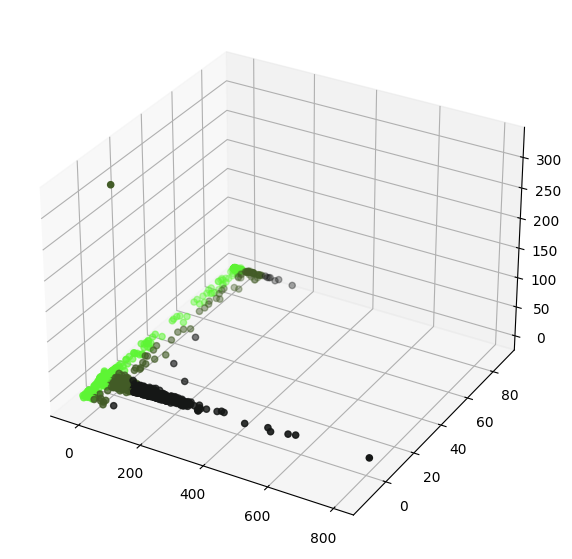

In [ ]:
# Geração do gráfico em 3 dimensões
colors = ['#5DF534', '#425B26', '#151716', '#876E03', '#E8CECF', '#023411', '#042E54', '#2572D3', '#FD0D0C', '#169C90']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 7:colors[7], 8:colors[8], 9:colors[9]})

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['color'])

# show plot
plt.show()